In [23]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

ZYAM: 3 to 4
3
['../InputData/pT_Rebin_1_15pT/pp_SE_L0_Correlation_GMB_Ratio.root', '../InputData/pT_Rebin_1_15pT/pPb_SE_L0_Correlation_GMB_Ratio.root']
[12.0, 40.0]


In [24]:
print(N_dPhi_Bins)
print(dPhi_Bins)
print("")
print(len(delta_phi_centers))
print(delta_phi_centers)

8
[0.0, 0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069, 3.141592653589793]

8
[0.19634954084936207, 0.5890486225480862, 0.9817477042468103, 1.3744467859455345, 1.7671458676442586, 2.1598449493429825, 2.552544031041707, 2.945243112740431]


In [25]:
Corrs = ROOT_to_nparray()


 
                                       PROTON-PROTON

 
                                       PROTON-LEAD


<Figure size 2664x1224 with 0 Axes>

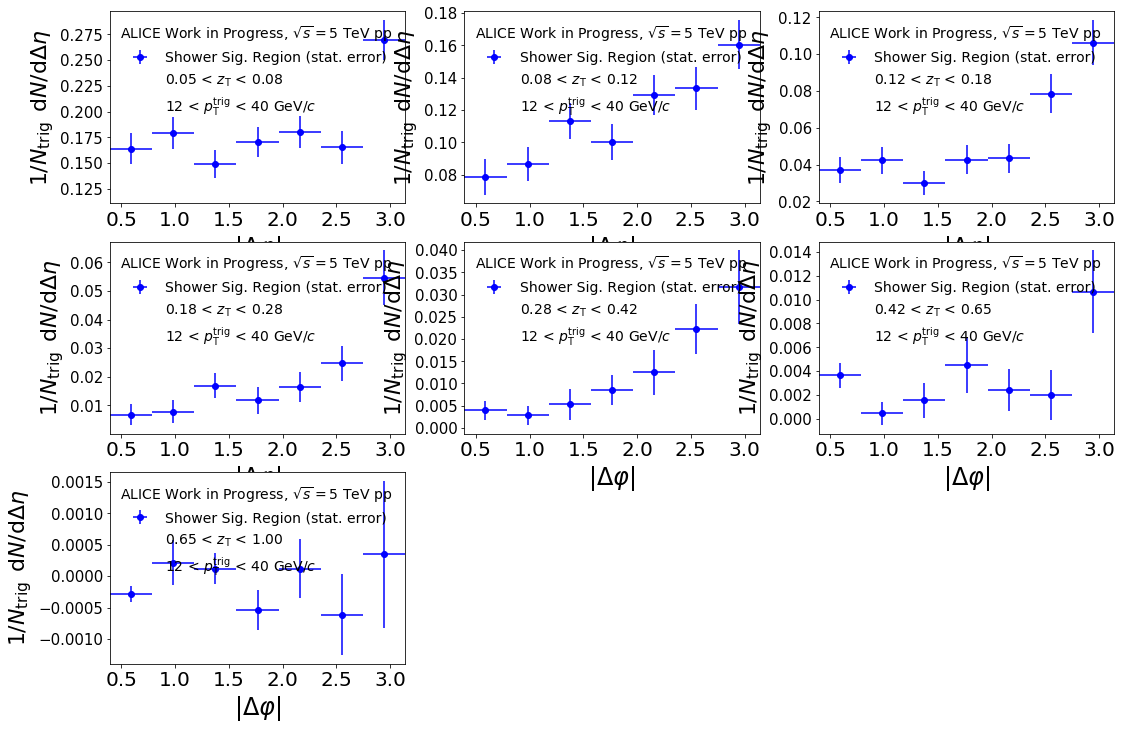

<Figure size 2664x1224 with 0 Axes>

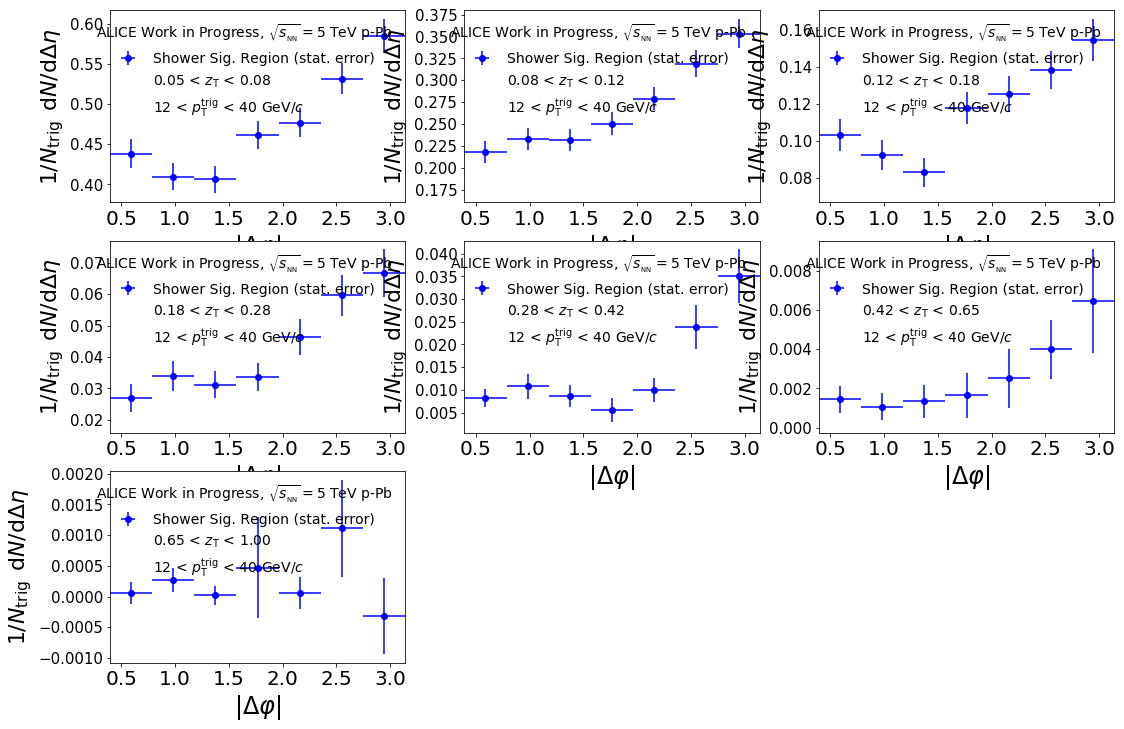

<Figure size 1728x864 with 0 Axes>

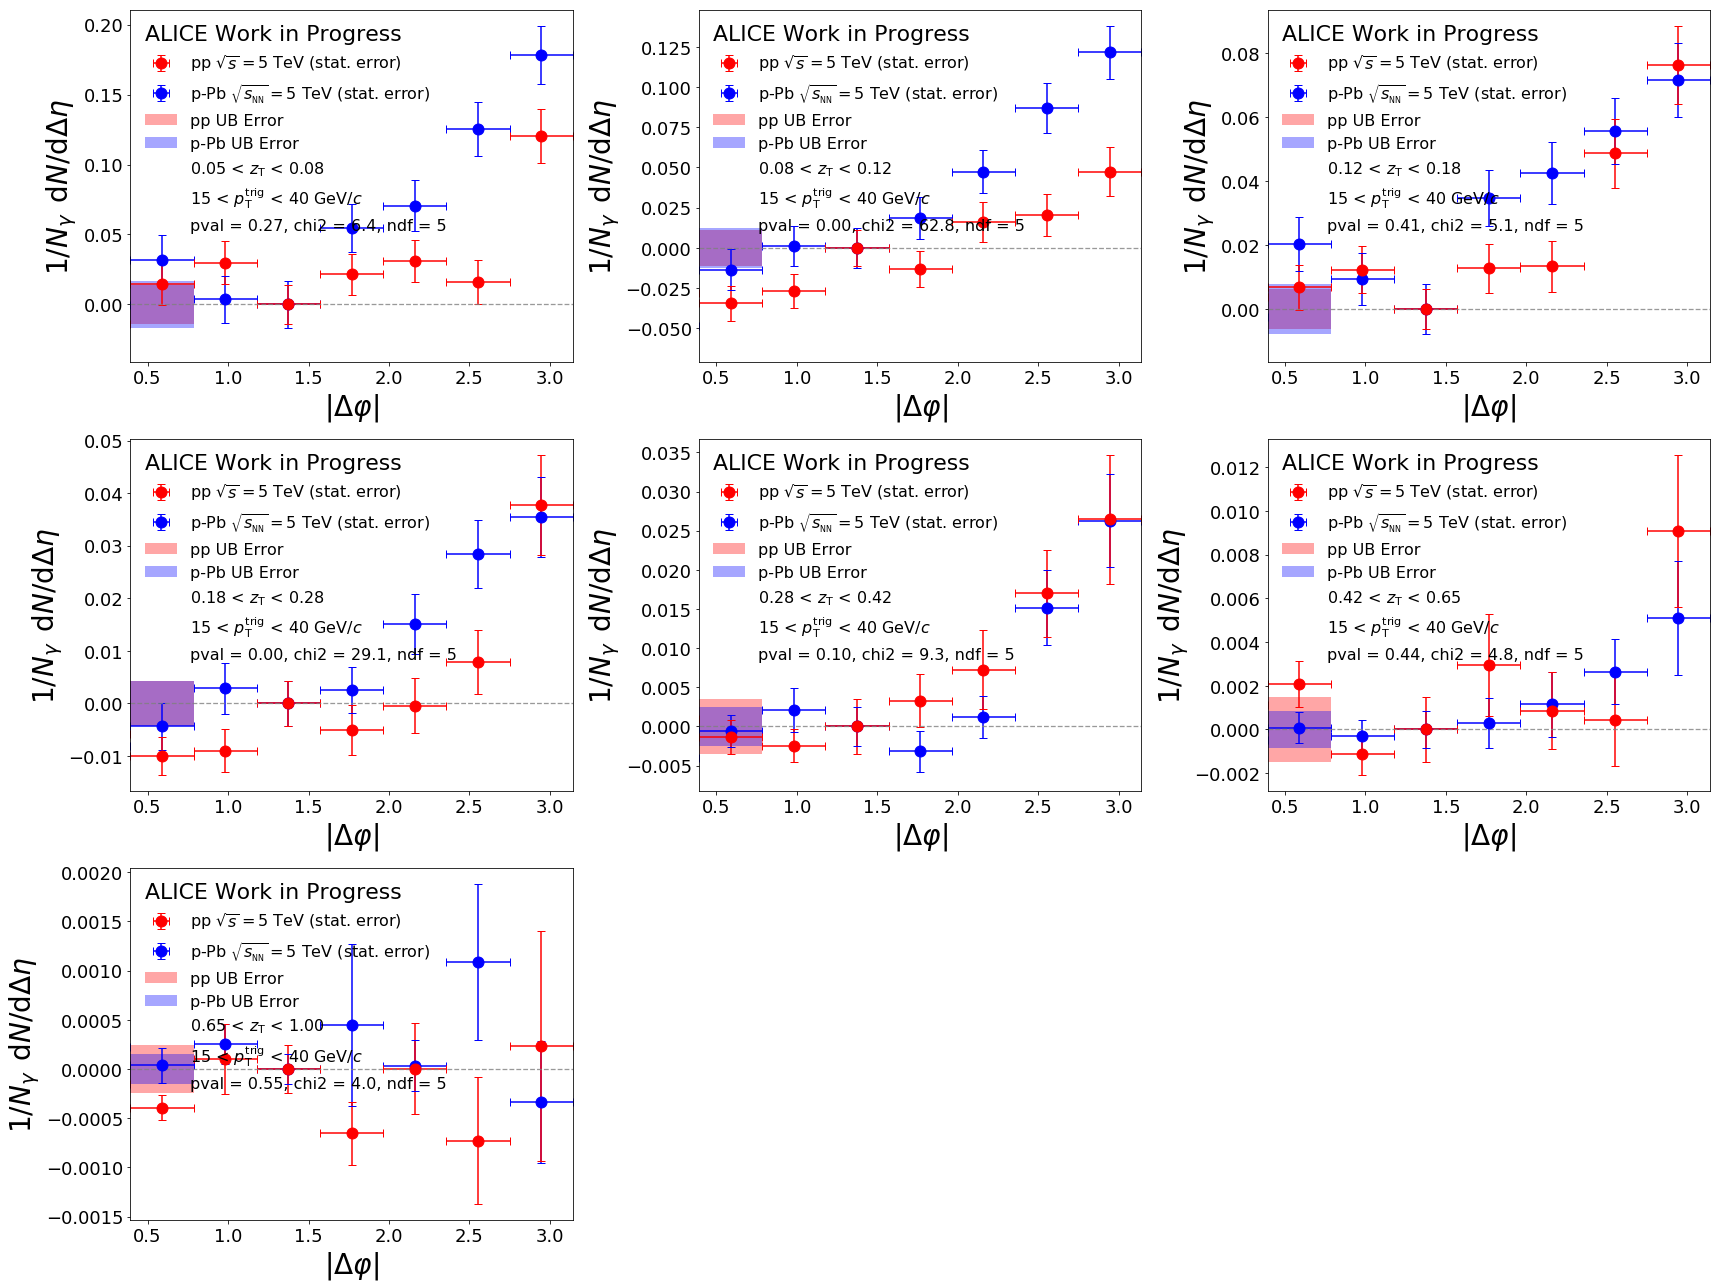

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10

In [26]:
Show_Plots = True
if (Ped_Sub_First):
    if (Show_Plots):
        Plot_UB()
        Plot_Sub_UB_Overlay(Corrs)
    Correlated_Subtraction(Corrs)
    
else:
    Correlated_Subtraction_Weights(Corrs)
    #Correlated_Subtraction(Corrs)
    if (Show_Plots):
        Plot_UB_Subtraction(Corrs)
    Ped_Sub_After_Cs(Corrs)
    if (Show_Plots):
        Plot_pp_pPb_Cs(Corrs)

$C_S = \frac{C_{SR} - (1-p) C_{BR}}{p}$

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

In [16]:
Frags = Get_Fragmentation(Corrs)

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}w_i x_i}{\sum_{i=1}^{n}w_i}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [17]:
Combined_Frags = Average_FF(Frags)

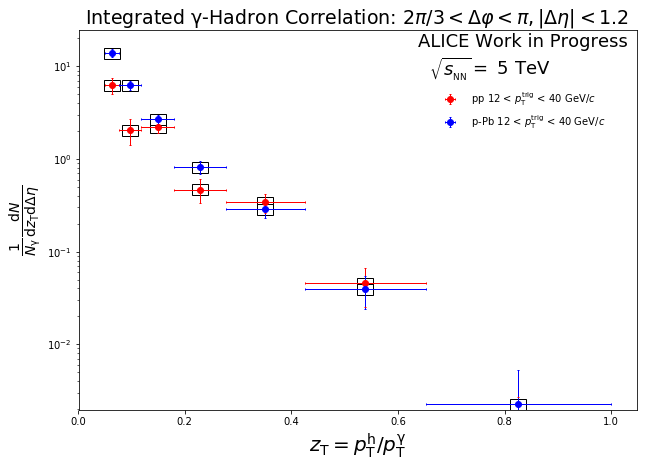

                    pp Central Values:
[  6.25731274e+00   2.04406865e+00   2.19971026e+00   4.68516483e-01
   3.42885398e-01   4.58236615e-02  -1.41047023e-03]

                    pp Stat. Uncertainty:
[ 1.22392329  0.64116205  0.30693229  0.13754891  0.07944838  0.02065526
  0.00412615]

                    p-Pb Central Values:
[  1.40062942e+01   6.24974409e+00   2.69803217e+00   8.19131938e-01
   2.88403348e-01   3.91943033e-02   2.25143061e-03]

                    p-Pb Stat. Uncertainty:
[ 1.42185105  0.71420674  0.31712196  0.12801841  0.05719883  0.01533772
  0.00302346]

                        LaTeX Table
Source   &  pp data & \pPb~data  \\
Statistical Uncertainty & -292\%-45\% & 10\%-134\% \\
\hline
Purity & -12\%-13\% & 13\%-13\% \\
Tracking Efficiency &  5\% & 5\%  \\ 


In [18]:
Plot_pp_pPb_Avg_FF(Combined_Frags)

In [8]:
reload(functions_fragmentation)
from functions_fragmentation import *

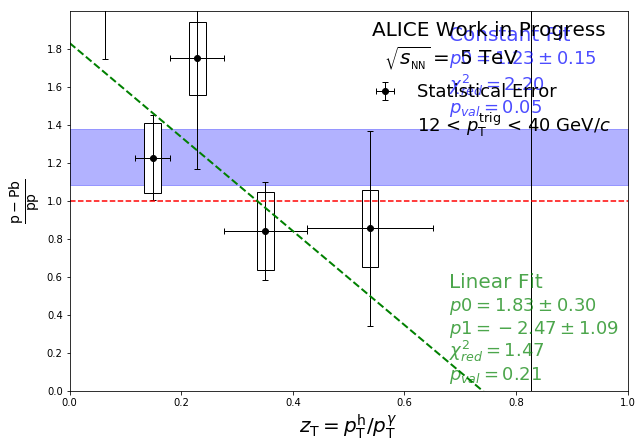

                Central Values:
[ 2.23838806  3.05750205  1.22653979  1.74835244  0.84110711  0.85532893
 -1.59622696]

                Ratio Uncertainty from Purity:
[ 0.13847311  0.13302032  0.16312481  0.14564958  0.19641468  0.19450864
  0.14919125]

                Ratio Uncertainty from Single Track Efficiency:
[ 0.15827794  0.21619804  0.08672946  0.12362719  0.05947525  0.06048089
 -0.11287029]

                Full Systematic Uncertainty:
[ 0.21030147  0.25384247  0.18474768  0.19104314  0.20522191  0.20369475
  0.18707681]

****************************************
Minimizer is Linear
Chi2                      =      11.0161
NDf                       =            5
p0                        =      1.23033   +/-   0.14582     

****************************************
Minimizer is Linear
Chi2                      =      5.88425
NDf                       =            4
p0                        =      1.82929   +/-   0.301944    
p1                        =     -2.46971   +/-   

In [9]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

## Compare Trigger pT Bins

In [63]:
reload(functions_correlations)
from functions_correlations import *

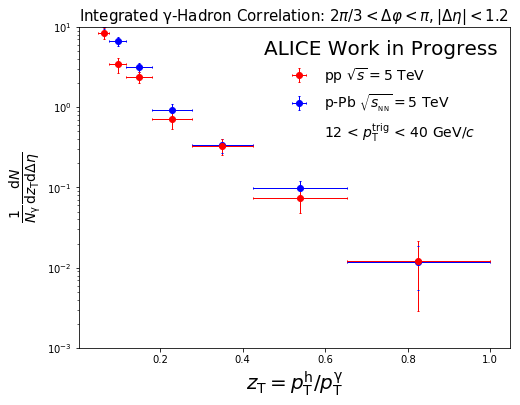

In [64]:
Plot_FF(Frags)

In [65]:
reload(functions_fragmentation)
from functions_fragmentation import *

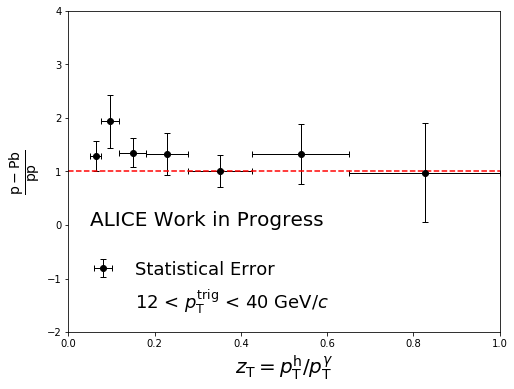

In [66]:
FF_Ratio(Frags)

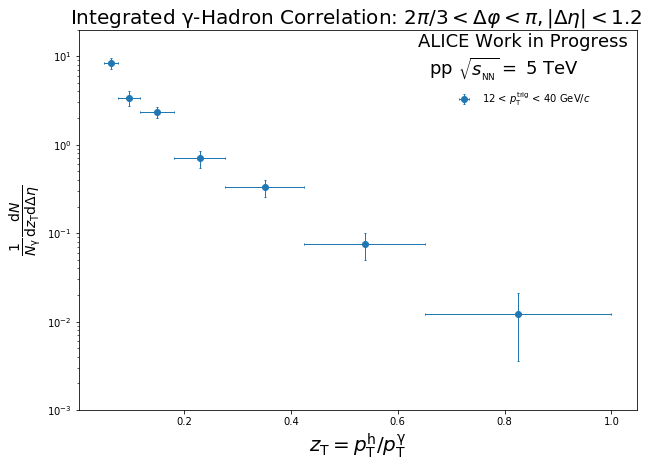

                             PROTON-PROTON:
Central Values
[[ 8.39714579  3.40889969  2.35192612  0.70338196  0.33045848  0.07487091
   0.01220589]]
Statistical Errors (Relative)
[[ 0.14754733  0.19996238  0.14596918  0.22071558  0.2185018   0.34216393
   0.70645352]]
Relative Uncertainty from Purity
[[ 1.3718971   0.55693443  0.38424968  0.11491615  0.05398918  0.01223215
   0.00199416]]




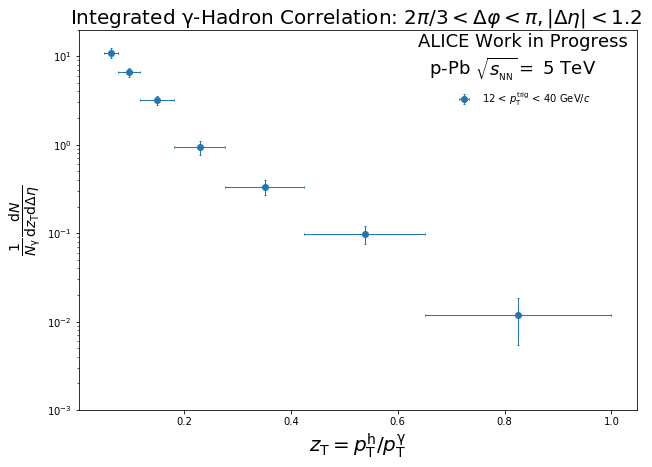

                              PROTON-LEAD:
Central Values
[[ 10.8758358    6.59335344   3.18227327   0.93145902   0.33365585
    0.09875375   0.0119124 ]]
Statistical Errors (Relative)
[[ 0.13262384  0.1211897   0.11935288  0.17077109  0.18616833  0.2312774
   0.54778721]]
Relative Uncertainty from Purity
[[ 1.77685704  1.07719964  0.51990898  0.1521786   0.05451156  0.01613405
   0.00194621]]




In [49]:
Overlay_pT_FF(Frags)

## Compare Track Cuts

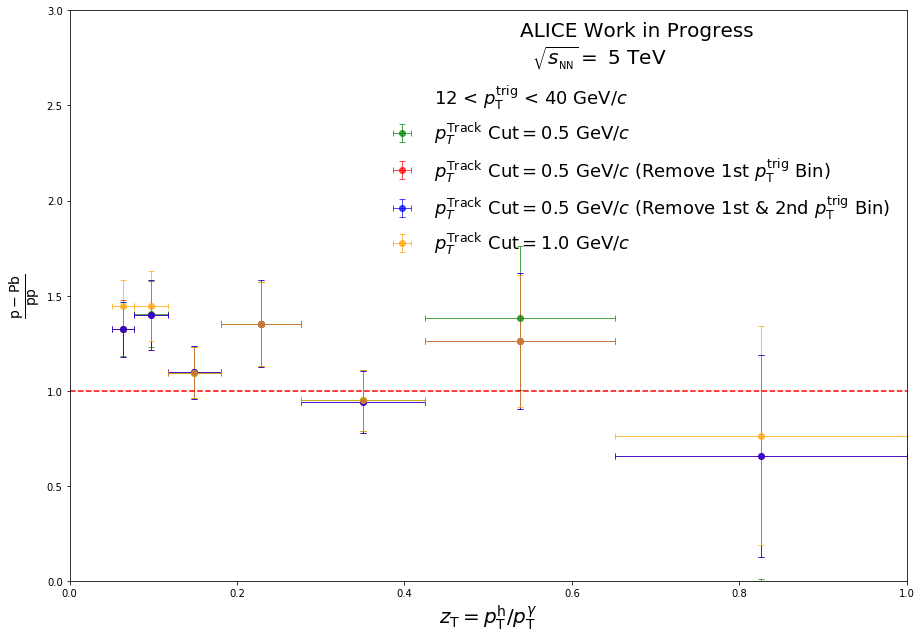

                Central Values:
[ 1.4457051   1.4481745   1.09574319  1.3500227   0.94988511  1.26222862
  0.76439433]

****************************************
Minimizer is Linear
Chi2                      =       5.8766
NDf                       =            5
p0                        =      1.20706   +/-   0.0696382   

****************************************
Minimizer is Linear
Chi2                      =      5.52934
NDf                       =            5
p0                        =      1.19855   +/-   0.0720959   

****************************************
Minimizer is Linear
Chi2                      =      5.55683
NDf                       =            5
p0                        =      1.20015   +/-   0.071502    

****************************************
Minimizer is Linear
Chi2                      =       8.3459
NDf                       =            5
p0                        =      1.24188   +/-   0.0690583   


In [50]:
strings = ["05zT","05zT_3bins","05zT_2bins","1zT"]
string_descriptions = ["$p_{T}^\mathrm{Track}\ \mathrm{Cut} = 0.5\ \mathrm{GeV}/c$",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st & 2nd $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 1.0\ \mathrm{GeV}/c$"]
colors = ["green","red","blue","orange"]
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

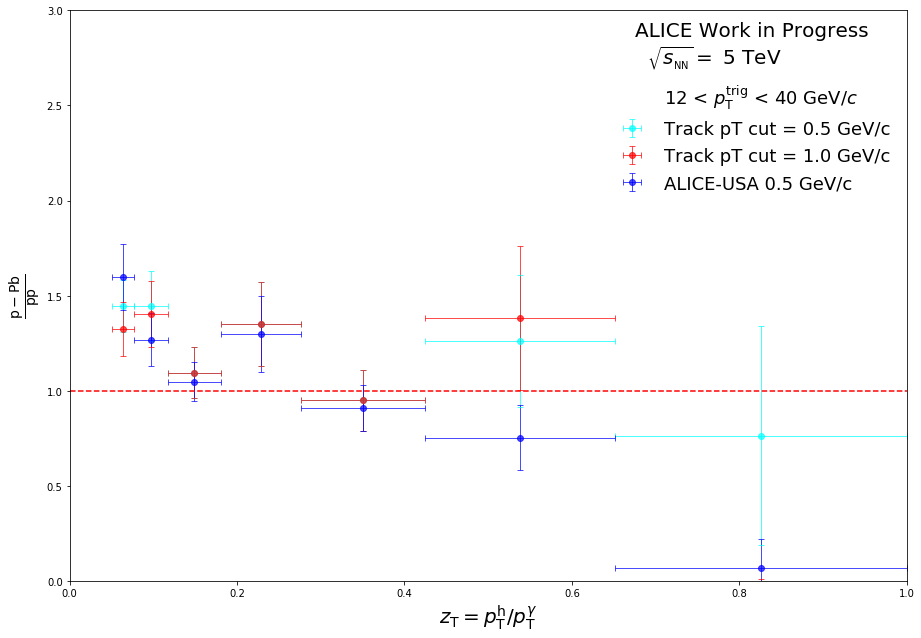

                Central Values:
[ 1.5979682   1.26981434  1.04878313  1.29933689  0.91089677  0.75447711
  0.07122347]

****************************************
Minimizer is Linear
Chi2                      =       8.3459
NDf                       =            5
p0                        =      1.24188   +/-   0.0690583   

****************************************
Minimizer is Linear
Chi2                      =       5.8766
NDf                       =            5
p0                        =      1.20706   +/-   0.0696382   

****************************************
Minimizer is Linear
Chi2                      =      17.6457
NDf                       =            5
p0                        =      1.10395   +/-   0.0570674   


In [51]:
strings = ["1zT","05zT","05zT_working_old"]
string_descriptions = ["Track pT cut = 0.5 GeV/c", "Track pT cut = 1.0 GeV/c","ALICE-USA 0.5 GeV/c"]
colors = ["cyan","red","blue"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

## Compare Trigger Photon pT Binning (3,4,& 5 Bins)

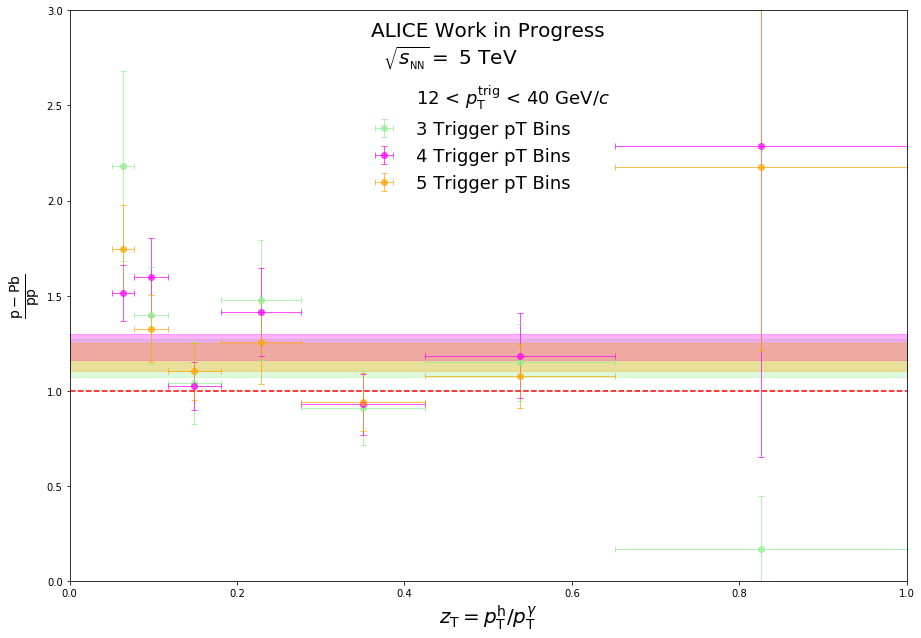

                Central Values:
[ 1.74759929  1.32684886  1.10166038  1.25803898  0.94240937  1.07806614
  2.1777261 ]

****************************************
Minimizer is Linear
Chi2                      =      8.03209
NDf                       =            5
p0                        =      1.17413   +/-   0.0992539   

****************************************
Minimizer is Linear
Chi2                      =      13.7672
NDf                       =            5
p0                        =      1.22951   +/-   0.0689375   

****************************************
Minimizer is Linear
Chi2                      =      9.91674
NDf                       =            5
p0                        =       1.1777   +/-   0.0718672   


In [17]:
strings = ["pT_Rebin_3","pT_Rebin_4","pT_Rebin_5"]
string_descriptions = ["3 Trigger pT Bins", "4 Trigger pT Bins","5 Trigger pT Bins"]
colors = ["lightgreen","magenta","orange"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

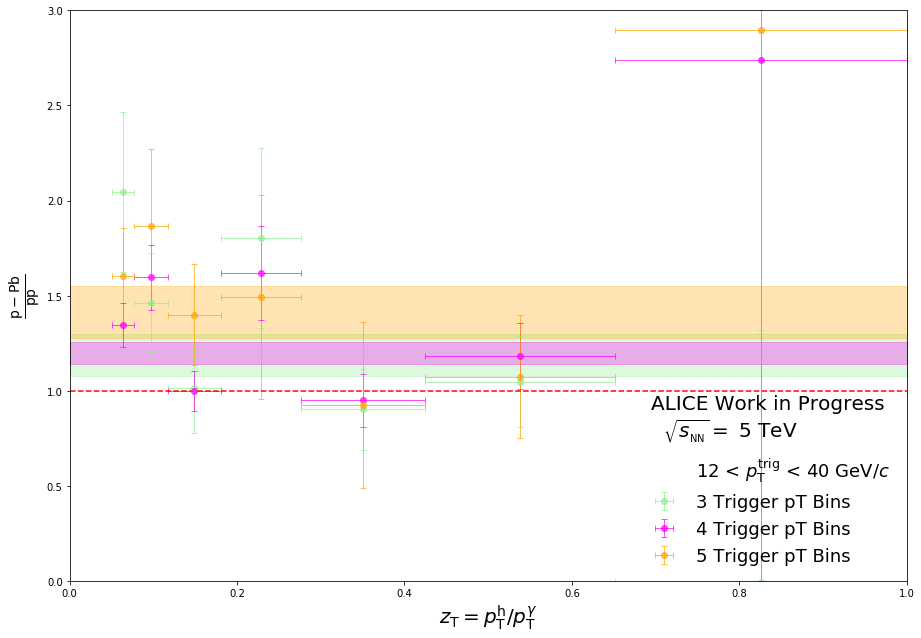

                Central Values:
[ 1.60368295  1.86557271  1.40054509  1.49282524  0.92696167  1.07433435
  2.89808321]

****************************************
Minimizer is Linear
Chi2                      =       9.6993
NDf                       =            5
p0                        =      1.18761   +/-   0.110241    

****************************************
Minimizer is Linear
Chi2                      =      16.5999
NDf                       =            5
p0                        =      1.19858   +/-   0.0575644   

****************************************
Minimizer is Linear
Chi2                      =      4.17259
NDf                       =            5
p0                        =      1.41375   +/-   0.13582     


In [18]:
strings = ["pT_Rebin_3_Cut","pT_Rebin_4_Cut","pT_Rebin_5_Cut"]
string_descriptions = ["3 Trigger pT Bins", "4 Trigger pT Bins","5 Trigger pT Bins"]
colors = ["lightgreen","magenta","orange"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

## Compare ZT Binning (6,7, & 8)

In [19]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


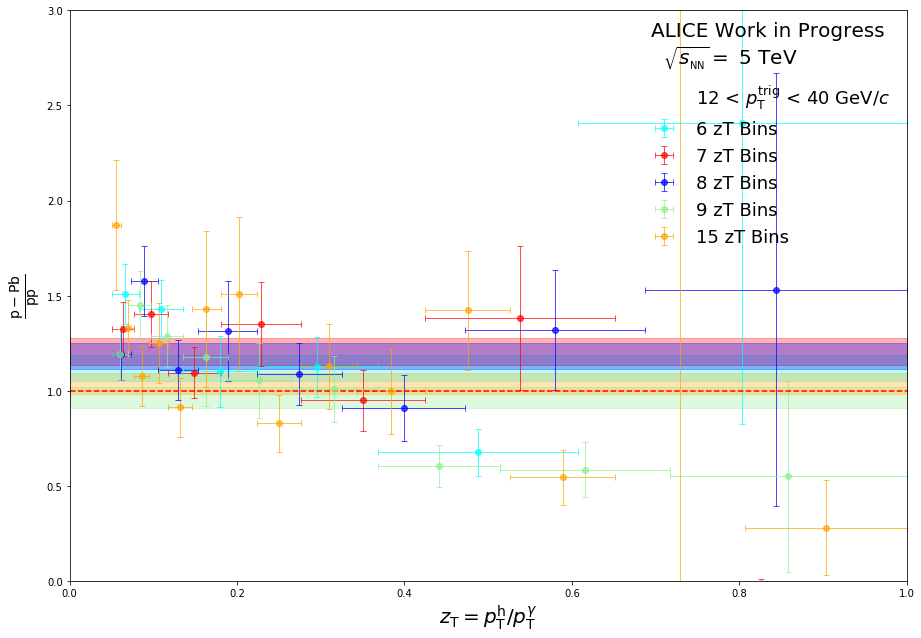

                Central Values:
[ 1.87060069  1.33279792  1.07594827  1.25077422  0.91343145  1.42914142
  1.50908939  0.82971572  1.12926386  0.9983693   1.42230144  0.54562724
  8.00428232  0.28118115]

****************************************
Minimizer is Linear
Chi2                      =      22.9635
NDf                       =            4
p0                        =      1.11802   +/-   0.0678079   

****************************************
Minimizer is Linear
Chi2                      =       5.8766
NDf                       =            5
p0                        =      1.20706   +/-   0.0696382   

****************************************
Minimizer is Linear
Chi2                      =      8.03276
NDf                       =            6
p0                        =      1.18169   +/-   0.0674303   

****************************************
Minimizer is Linear
Chi2                      =       32.454
NDf                       =            7
p0                        =     0.

In [20]:
strings = ["zT_Rebin_6","05zT","zT_Rebin_8","zT_Rebin_9","zT_Rebin_15"]
string_descriptions = ["6 zT Bins", "7 zT Bins", "8 zT Bins","9 zT Bins","15 zT Bins"]
colors = ["cyan","red","blue","lightgreen","orange"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


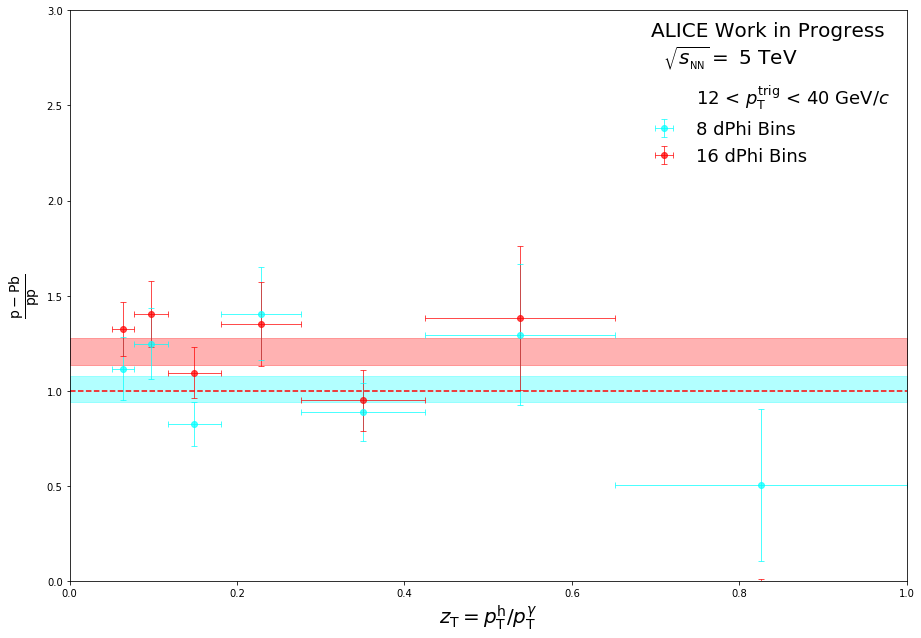

                Central Values:
[ 1.32366377  1.40359966  1.09574319  1.35002169  0.94964235  1.38229225
 -0.24905534]

****************************************
Minimizer is Linear
Chi2                      =      8.52694
NDf                       =            5
p0                        =      1.00889   +/-   0.0689374   

****************************************
Minimizer is Linear
Chi2                      =       5.8766
NDf                       =            5
p0                        =      1.20706   +/-   0.0696382   


In [21]:
strings = ["dPhi_Rebin_16","05zT"]
string_descriptions = ["8 dPhi Bins", "16 dPhi Bins"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


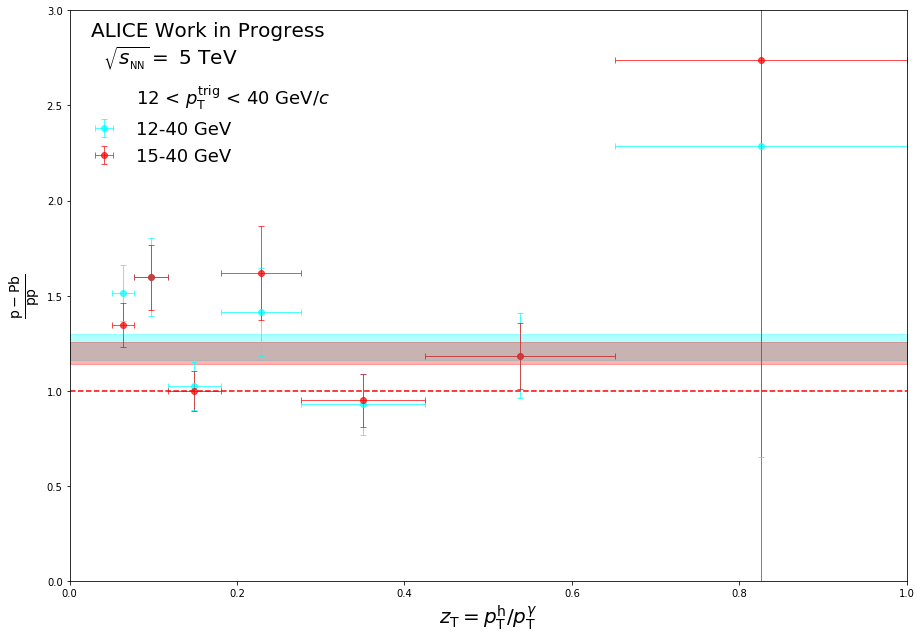

                Central Values:
[ 1.34555207  1.59583687  0.99905319  1.61926902  0.94942324  1.18174526
  2.73688196]

****************************************
Minimizer is Linear
Chi2                      =      13.7672
NDf                       =            5
p0                        =      1.22951   +/-   0.0689375   

****************************************
Minimizer is Linear
Chi2                      =      16.5999
NDf                       =            5
p0                        =      1.19858   +/-   0.0575644   


In [22]:
strings = ["pT_Rebin_4","pT_Rebin_4_Cut"]
string_descriptions = ["12-40 GeV", "15-40 GeV"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


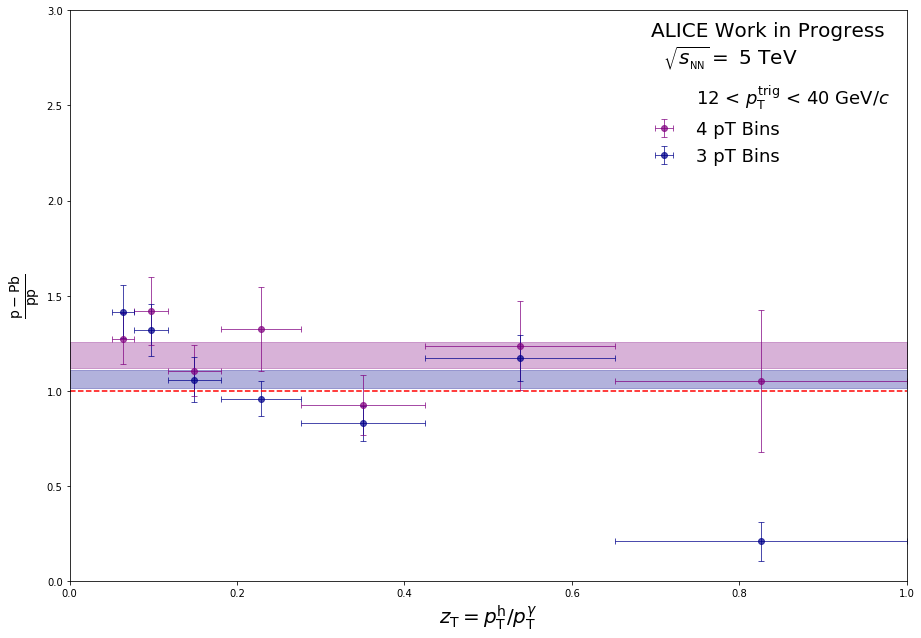

                Central Values:
[ 1.41661878  1.31934069  1.05935782  0.95893096  0.8298763   1.17231065
  0.20835547]

****************************************
Minimizer is Linear
Chi2                      =      5.68487
NDf                       =            5
p0                        =      1.18878   +/-   0.0671922   

****************************************
Minimizer is Linear
Chi2                      =      18.2339
NDf                       =            5
p0                        =      1.06135   +/-   0.0457129   


In [23]:
strings = ["pT_Rebin_4_Weights","pT_Rebin_3_Weights"]
string_descriptions = ["4 pT Bins", "3 pT Bins"]
colors = ["purple","darkblue"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


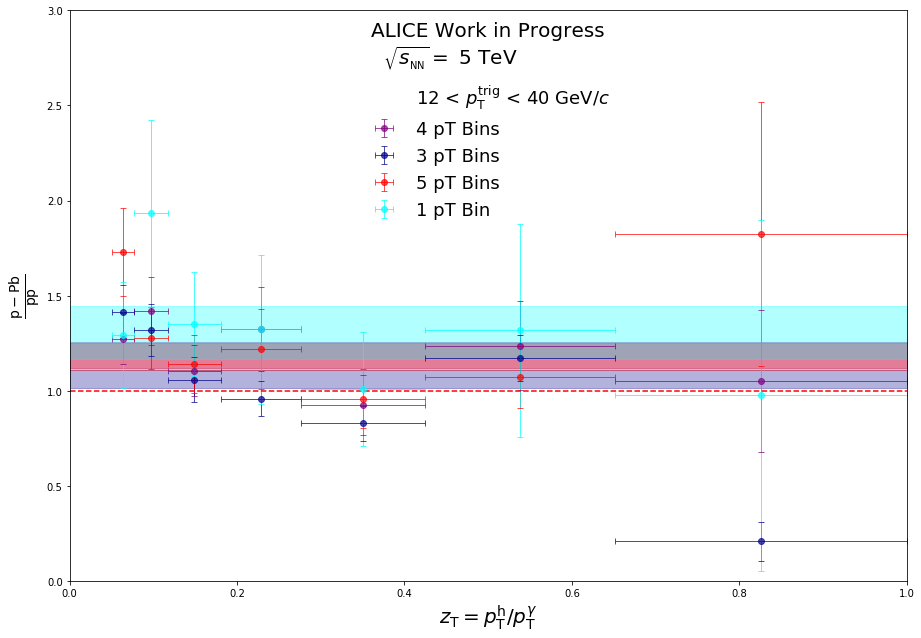

                Central Values:
[ 1.29518244  1.93415883  1.35304985  1.32425776  1.00967556  1.31898697
  0.97595493]

****************************************
Minimizer is Linear
Chi2                      =      5.68487
NDf                       =            5
p0                        =      1.18878   +/-   0.0671922   

****************************************
Minimizer is Linear
Chi2                      =      18.2339
NDf                       =            5
p0                        =      1.06135   +/-   0.0457129   

****************************************
Minimizer is Linear
Chi2                      =      8.54903
NDf                       =            5
p0                        =      1.18012   +/-   0.0706834   

****************************************
Minimizer is Linear
Chi2                      =      2.63148
NDf                       =            5
p0                        =      1.30601   +/-   0.139861    


In [30]:
strings = ["pT_Rebin_4_Weights","pT_Rebin_3_Weights","pT_Rebin_5_Weights","pT_Rebin_1"]
string_descriptions = ["4 pT Bins", "3 pT Bins","5 pT Bins","1 pT Bin"]
colors = ["purple","darkblue","red","cyan"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


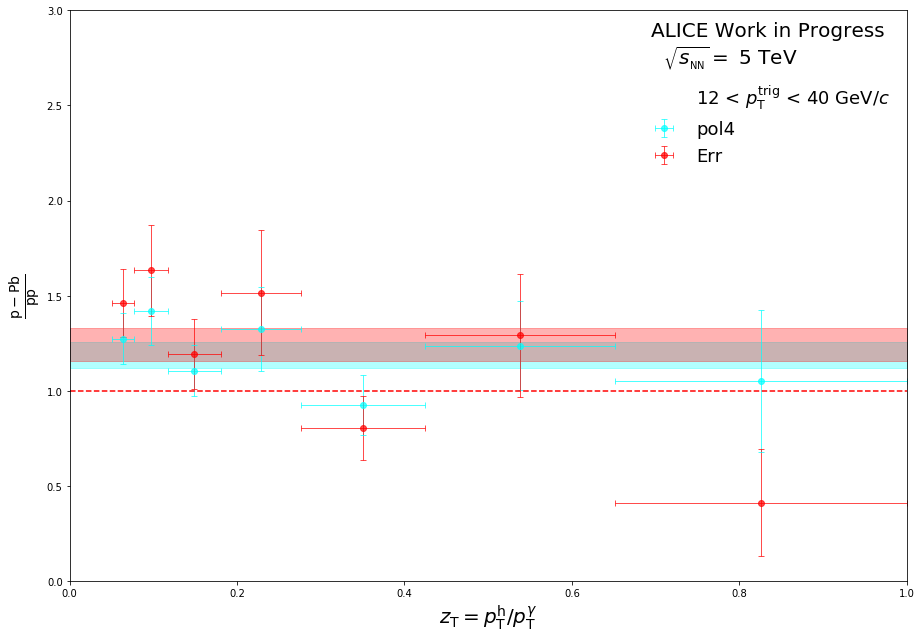

                Central Values:
[ 1.46092097  1.63384614  1.19441755  1.51656857  0.8036661   1.29094692
  0.4121031 ]

****************************************
Minimizer is Linear
Chi2                      =      5.68487
NDf                       =            5
p0                        =      1.18878   +/-   0.0671922   

****************************************
Minimizer is Linear
Chi2                      =       11.703
NDf                       =            5
p0                        =      1.24168   +/-   0.0868613   


In [25]:
strings = ["pT_Rebin_4_Weights","pT_Rebin_4_ErrWeights"]
string_descriptions = ["pol4", "Err"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


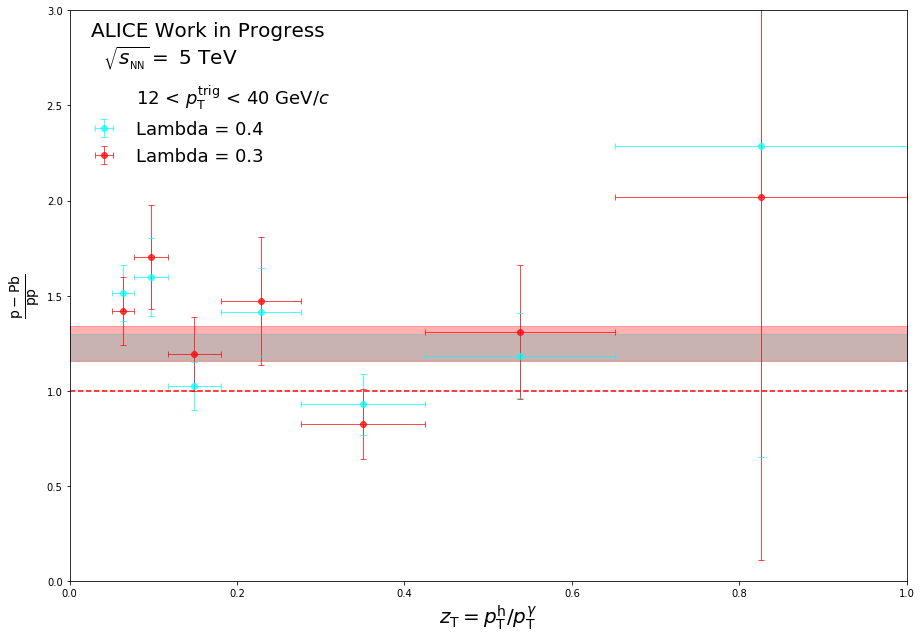

                Central Values:
[ 1.41941026  1.70222614  1.19527022  1.4729536   0.82636153  1.31005331
  2.01777407]

****************************************
Minimizer is Linear
Chi2                      =      13.7672
NDf                       =            5
p0                        =      1.22951   +/-   0.0689375   

****************************************
Minimizer is Linear
Chi2                      =      9.42663
NDf                       =            5
p0                        =      1.24905   +/-   0.0924882   


In [26]:
strings = ["pT_Rebin_4","pT_Rebin_4_Lambda"]
string_descriptions = ["Lambda = 0.4", "Lambda = 0.3"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [ ]:
strings = ["pT_Rebin_4","pT_Rebin_4_Lambda"]
string_descriptions = ["Lambda = 0.4", "Lambda = 0.3"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [27]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

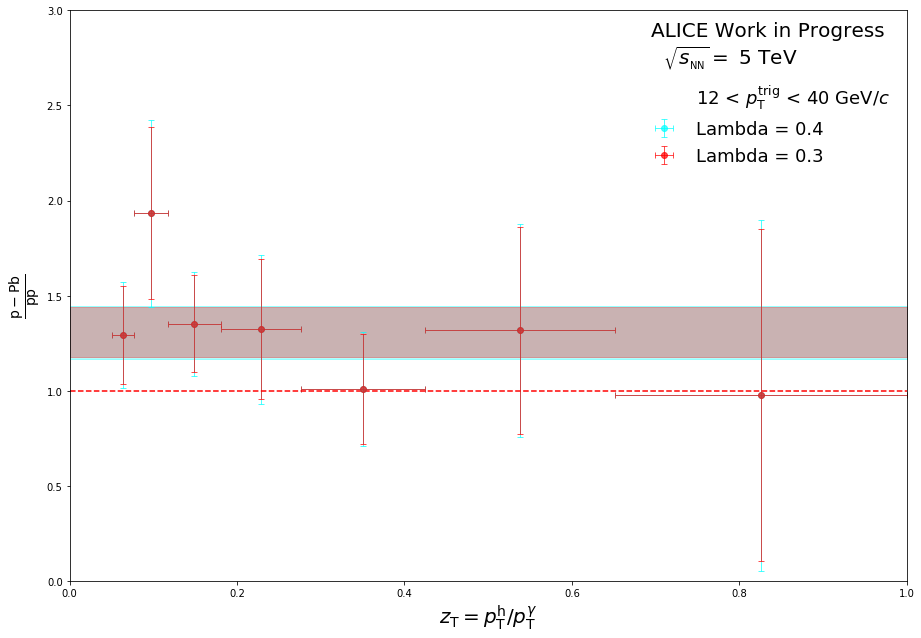

                Central Values:
[ 1.29518244  1.93415883  1.35304985  1.32425776  1.00967556  1.31898697
  0.97595493]

****************************************
Minimizer is Linear
Chi2                      =      2.63148
NDf                       =            5
p0                        =      1.30601   +/-   0.139861    

****************************************
Minimizer is Linear
Chi2                      =      3.01198
NDf                       =            5
p0                        =      1.31083   +/-   0.131311    


In [67]:
strings = ["pT_Rebin_1","pT_Rebin_1_16dPhi"]
string_descriptions = ["Lambda = 0.4", "Lambda = 0.3"]
colors = ["cyan","red"]
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [29]:
print(pTbins)

[12.0, 40.0]
